In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Classification example with Iris dataset

This example dataset task is in classifying flower based on its features

In [2]:
iris = datasets.load_iris() # This dataset boult in `sklearn` library so you can load it directly
iris_features = iris['feature_names']

Print all flowers and features

In [3]:
print(f"Dataset features:\n{iris['feature_names']}")
print(f"Dataset classes:\n{iris.target_names}")

Dataset features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset classes:
['setosa' 'versicolor' 'virginica']


Now we should visually analyze the dataset

As we are limited by 2D displays and cannot visualize 4d data in a single plot - let's print data 2-axis at a time

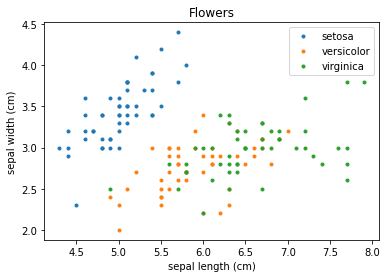

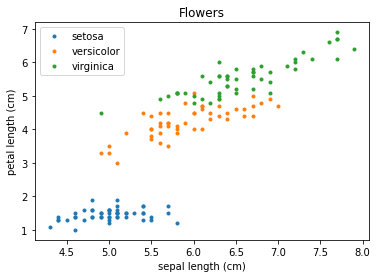

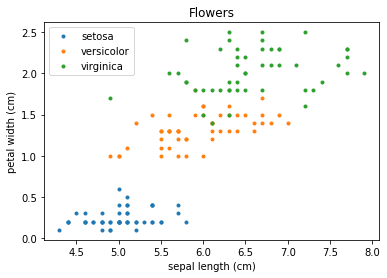

In [4]:
for j in [1,2,3]:
    for i, class_name in enumerate(iris.target_names):
        sepal_length = iris.data[:, 0][iris.target == i]
        sepal_width = iris.data[:, j][iris.target == i]
        plt.plot(sepal_length, sepal_width, '.', label=class_name)

    plt.title("Flowers")
    plt.xlabel(iris_features[0])
    plt.ylabel(iris_features[j])
    plt.legend()
    plt.show()

## Plotting decision boundaries

Decision boundaries allows us to visualize how given classifier thinks data should be splitted into a different classes

For this let's focus on first 2 features ('sepal length (cm)', 'sepal width (cm)') to have consistent 2D plot

In [5]:
def plot_decision(clf, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)

    for i, class_name in enumerate(iris.target_names):
        sepal_length = iris.data[:, 0][iris.target == i]
        sepal_width = iris.data[:, 1][iris.target == i]
        plt.plot(sepal_length, sepal_width, '.', label=class_name)

    plt.title(title)
    plt.xlabel(iris_features[0])
    plt.ylabel(iris_features[j])
    plt.legend()
    plt.show()

In [6]:
# Select first 2 features
X = iris.data[:, [0,1]]
y = iris.target

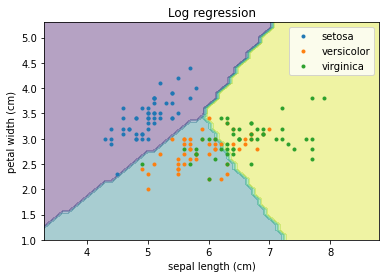

In [7]:
l_regression = LogisticRegression()
l_regression = l_regression.fit(X, y)
plot_decision(l_regression, title="Log regression")

We can see that `LogisticRegression`model cannot properly divide 'versicolor' and 'virginica' classes based on that 2 features

To divide classes properly we need to introduce non-linear models such and Neural Networks or Decision Trees

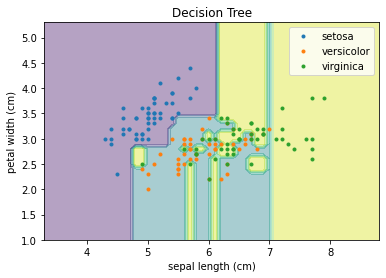

In [8]:
tree = DecisionTreeClassifier()
tree = tree.fit(X, y)
plot_decision(tree, title="Decision Tree")

# Train-Test split

Let's now evaluate model using [test-train split](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/) approach

This is a common technique for checking model generalization. 
You train model on some part of the dataset (lets say 67%, or 75%) and that you check if you model generalizes well by prediction on data that left 


In [9]:
X = iris.data # Use all iris features as predictors 
y = iris.target

Split data randomly using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Set `test_size=0.25` to use 25% data for test and 75% for train

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=117)

In [11]:
# function for printing results
def eval_model(clf, X_test, y_test):
    pred = clf.predict(X_test)
    accuracy = np.mean(pred == y_test)
    print(f"Model accuracy: {accuracy*100:0.2f}%")
    df = pd.DataFrame(confusion_matrix(y_test, pred))
    df.columns = ["Classified as " + x for x in iris.target_names]
    df.index = iris.target_names
    return df

Train model on `train` data 

In [12]:
l_regression = LogisticRegression()
l_regression = l_regression.fit(X_train, y_train)

And evaluate on `test` data 

In [13]:
eval_model(l_regression, X_test, y_test)

Model accuracy: 94.74%


,Classified as setosa,Classified as versicolor,Classified as virginica
setosa,14,0,0
versicolor,0,8,0
virginica,0,2,14


You should see accuracy close to 100% as Iris is quite easy dataset where data can be almost perfectly classified if all 4 features used

Using confusion matrics printed above you may also see that all examples of 'setosa' classified as 'setosa',, while there are some errors between 'versicolor'-'virginica' classes